# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [3]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

print(A@e_1)
print(A@e_2)
print(A@e_3)

[1 4 7]
[2 5 8]
[3 6 9]


    Each operation selects one column of matrix A, based on which column has the 1. This is because for each row of the matrix, you multiply the corresponding column value in the vector and sum the values. Since there are zeros in the other columns, you are left with just the value in the same column as the one.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [4]:
u = np.ones(3)
A@u

array([ 6., 15., 24.])

    This result makes sense because when you multiply a matrix and a vector, you sum the result of the multiplication across the rows. Since the vector is (1,1,1), you just sum the values in each row of the matrix.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [11]:
A = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

A@x


array([-2,  4, 11])

    You get the vector x as the result. Multiplying an identity matrix by any vector will produce that vector. This makes sense because for each row of the identity matrix, only the corresponding column is kept, thus removing the other values.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [15]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

print(A@x)

B = np.array([[0,1,0],
              [0,0,1],
              [1,0,0]])
print(B@x)

[11 -2  4]
[ 4 11 -2]


    Depending on what the matrix is, the order of the values of x are shifted.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [35]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A, '\n')

e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

print(A@e_1, '\n')
print(A@e_2, '\n')
print(A@e_3, '\n')

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]] 

[0.50052958 0.02574731 0.47372311] 

[0.24049286 0.39251588 0.36699127] 

[0.18358131 0.37907577 0.43734292] 



    When multiplying by e1, only the first column is kept. For e2, the second column is kept. For e3, the 3rd column is kept. This makes sense because e1, e2, and e3 all have a single indicator that corresponds to which column to select.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [57]:
result = e_1
for i in range(5):
    result = A@result
    print(result)

[0.50052958 0.02574731 0.47372311]
[0.34368862 0.20257047 0.45374091]
[0.30404142 0.26036337 0.43559521]
[0.29476439 0.27514859 0.43008701]
[0.29266551 0.27862515 0.42870935]


In [56]:
result = e_2
for i in range(5):
    result = A@result
    print(result)

[0.24049286 0.39251588 0.36699127]
[0.28214379 0.29937825 0.41847795]
[0.29004438 0.28341002 0.42654561]
[0.29163968 0.2804039  0.42795643]
[0.29197422 0.27979983 0.42822595]


In [55]:
result = e_3
for i in range(5):
    result = A@result
    print(result)

[0.18358131 0.37907577 0.43734292]
[0.26334088 0.31930609 0.41735304]
[0.28521895 0.29032145 0.4244596 ]
[0.29050361 0.28220175 0.42729464]
[0.29171646 0.2802254  0.42805814]


    For all of the starting vectors, the values begin to converge towards [0.292, 0.280. 0.428].

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [59]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

s_0 = np.array([1,0])

T@s_0

array([0.25, 0.75])

    T@s_0 = [1*0.25 + 0*0.5, 1*0.75 + 0*0.5]

    This object is the proportion of time that the next state will be either 1 or 2.

In [53]:
T@T@s_0

array([0.4375, 0.5625])

    This is the proportion of time that state 3 will be either 1 or 2, starting from the initial condition [1,0].

In [61]:
result = s_0
for i in range(15):
    result = T@result
    print(result)

[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]


    It starts to settle down around the 6th future state prediction, with only very minor changes taht eventually stop in the 14th future state prediction.

In [62]:
s_0 = np.array([0,1])
print(s_0)
result = s_0
for i in range(15):
    result = T@result
    print(result)

[0 1]
[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]
[0.4000001 0.5999999]
[0.39999998 0.60000002]
[0.40000001 0.59999999]
[0.4 0.6]
[0.4 0.6]


    The result is the same, despite starting in a different initial condition.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [63]:
import pandas as pd

In [73]:
weather = pd.read_csv('data/cville_weather.csv')
weather.isna().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

    There are many instances of missing data.

In [76]:
weather['rain'] = [1 if x > 0 else 0 for x in weather['PRCP']]
weather[['rain', 'PRCP']].head()

,rain,PRCP
0,1,0.03
1,1,1.08
2,1,0.24
3,1,3.00
4,0,0.00


In [84]:
#transition matrix
states = [1,0]
S = len(states)
T = len(weather['rain'])
tr_counts = np.zeros( (S,S) )

#code block adapted from course notes: 04_dynamics.ipynb

for t in range(1,T): # For each transition
    # Current and next tokens:
    x_tm1 = weather['rain'][t-1] # previous state
    x_t = weather['rain'][t] # current state
    # Determine transition indices:
    index_from = states.index(x_tm1)
    index_to = states.index(x_t)
    # Update transition counts:
    tr_counts[index_to, index_from] += 1

print(f'\nTransition Counts:\n {tr_counts}')

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print(f'\nState Counts: \n {sums}')

# Sum the transition counts by row:
print(f'\nState proportions: \n {sums/np.sum(sums)}')

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                            out=np.zeros_like(tr_counts), 
                            where= sums!=0)

print(f'\nTransition Proportions:')
pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)


Transition Counts:
 [[116.  62.]
 [ 63. 169.]]

State Counts: 
 [[178.]
 [232.]]

State proportions: 
 [[0.43414634]
 [0.56585366]]

Transition Proportions:


,1,0
1,0.65,0.35
0,0.27,0.73


    If it was rainy yesterday, there is a 65% chance to rain again today. If it was clear yesterday, there is a 27% chance to rain today.

In [90]:
# forecast from clear day
state_0 = np.array([0,1])
result = state_0
for i in range(15):
    result = tr_pr@result
    print(result)

[0.34831461 0.72844828]
[0.48072072 0.62522232]
[0.53105274 0.58598266]
[0.55018563 0.57106635]
[0.55745869 0.56539615]
[0.56022342 0.56324072]
[0.56127439 0.56242137]
[0.5616739  0.56210991]
[0.56182577 0.56199151]
[0.5618835 0.5619465]
[0.56190544 0.56192939]
[0.56191378 0.56192289]
[0.56191696 0.56192042]
[0.56191816 0.56191948]
[0.56191862 0.56191912]


    Starting from a clear day, it converges to a fixed result after about 7 predictions.

In [89]:
# forecast from rainy day
state_0 = np.array([1,0])
result = state_0
for i in range(15):
    result = tr_pr@result
    print(result)

[0.65168539 0.27155172]
[0.51927928 0.37477768]
[0.46894726 0.41401734]
[0.44981437 0.42893365]
[0.44254131 0.43460385]
[0.43977658 0.43675928]
[0.43872561 0.43757863]
[0.4383261  0.43789009]
[0.43817423 0.43800849]
[0.4381165 0.4380535]
[0.43809456 0.43807061]
[0.43808622 0.43807711]
[0.43808304 0.43807958]
[0.43808184 0.43808052]
[0.43808138 0.43808088]


    Starting from a rainy day, it converges to a fixed results after about 8 predictions.

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

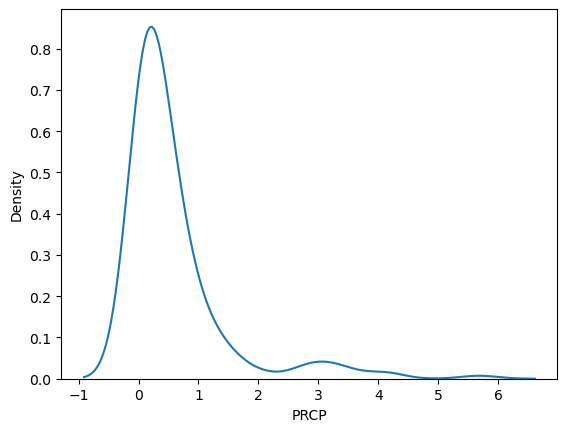

In [121]:
rainy = weather[weather['rain'] == 1]['PRCP']
sns.kdeplot(rainy)
plt.show()

    One way to improve this model is to make it dependent on more than just one past state to determine what the next state will be. This should make forecasting and simulating more accurate as it bases the prediction on more data.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [98]:
with open('data/taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

print(len(data))
data[0]

1000


0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
            ...        
29                 SoHo
29                 SoHo
13    Greenwich Village
3               Chelsea
3               Chelsea
Name: nbhd, Length: 26026, dtype: object

In [99]:
states = set()
for i in range(1, len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i)

states = list(states)

In [100]:
S = len(states)
tr_counts = np.zeros( (S,S) )

## compute trasnition counts
for trip in data:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        #current and next tokens
        x_tml = seq[t-1] #previous state
        x_t = seq[t] #current state
        # determine transition indices
        index_from = states.index(x_tml)
        index_to = states.index(x_t)
        # update transition counts
        tr_counts[index_from, index_to] += 1

print('Transition Counts:\n', tr_counts)
        

Transition Counts:
 [[2.373110e+05 3.669700e+04 1.567400e+04 ... 1.305000e+03 2.587200e+04
  3.280000e+02]
 [3.796900e+04 1.283151e+06 1.954600e+04 ... 6.048000e+03 5.129300e+04
  1.158000e+03]
 [1.554500e+04 1.859200e+04 6.257200e+04 ... 4.820000e+02 1.676400e+04
  1.230000e+02]
 ...
 [6.470000e+02 3.685000e+03 2.150000e+02 ... 1.123400e+04 3.360000e+02
  4.230000e+02]
 [2.221700e+04 5.817500e+04 1.560500e+04 ... 8.230000e+02 1.280130e+05
  1.960000e+02]
 [1.650000e+02 9.000000e+02 4.000000e+01 ... 1.170000e+03 8.600000e+01
  9.800000e+02]]


In [101]:
# sum the transition counts by row
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[8.886440e+05 2.797713e+06 3.952740e+05 8.393620e+05 1.000000e+00
  1.112860e+05 1.743220e+05 2.292330e+05 3.168490e+05 3.701250e+05
  5.505970e+05 1.978283e+06 4.415950e+05 3.603000e+03 5.017430e+05
  1.058730e+05 3.851929e+06 4.086400e+05 1.038800e+04 2.363961e+06
  4.930000e+02 1.200000e+01 1.224325e+06 1.803491e+06 5.790800e+04
  3.705660e+05 8.010000e+03 5.077760e+05 2.171620e+05 1.627050e+05
  3.859100e+04 5.102620e+05 8.740550e+05 1.063770e+05 3.000000e+00
  7.253000e+04 6.543970e+05 1.431200e+04]]


Transition Proportions:

                     East Village  Upper East Side  Flatiron District  \
East Village                 0.27             0.01               0.04   
Upper East Side              0.04             0.46               0.05   
Flatiron District            0.02             0.01               0.16   
West Village                 0.04             0.01               0.04   
Liberty Island               0.00             0.00               0.00   
Stuyvesant Town              0.01             0.00               0.01   
NoHo                         0.02             0.00               0.01   
Battery Park City            0.01             0.00               0.01   
East Harlem                  0.00             0.03               0.00   
Central Park                 0.00             0.03               0.01   
SoHo                         0.03             0.01               0.02   
Chelsea                      0.06             0.03               0.15   
Financial District        

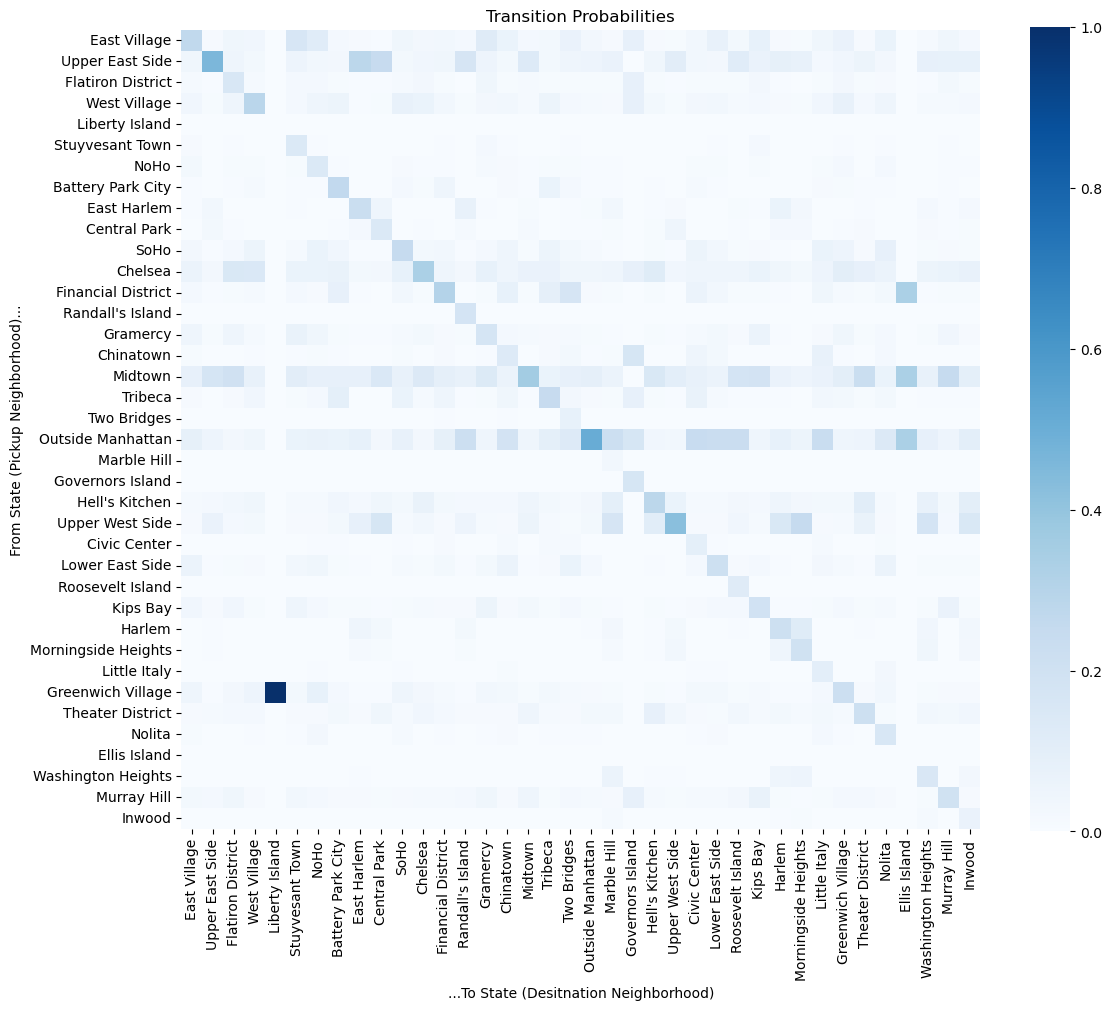

In [105]:
#normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, out = np.zeros_like(tr_counts), where=sums!=0)

print('Transition Proportions:\n')
tr_df = pd.DataFrame(np.round(tr_pr, 2), index=states, columns=states)
print(tr_df)

plt.figure(figsize=(12,10))
sns.heatmap(tr_pr,
            cmap='Blues',
            square=True,
            xticklabels=states,
            yticklabels=states)

plt.title('Transition Probabilities')
plt.xlabel('...To State (Desitnation Neighborhood)')
plt.ylabel('From State (Pickup Neighborhood)...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

    The most common route is from Greenwich Village to Liberty Island. Additionally routes that begin and end in the same neighborhood tend to be pretty common.

    Taxicabs are most likely order 1 because passengers from a particular neighborhood probably have similar categories of destinations. It doesn't matter where the taxicab came from prior to the pickup because the passenger doesn't care where the taxicab came from, they just want to get where they want to go.

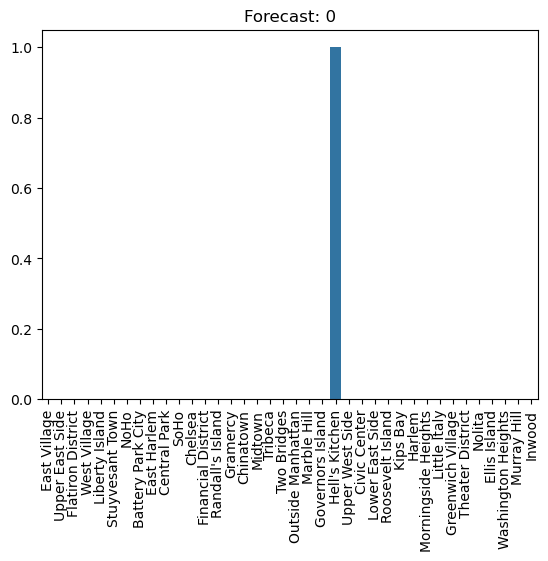

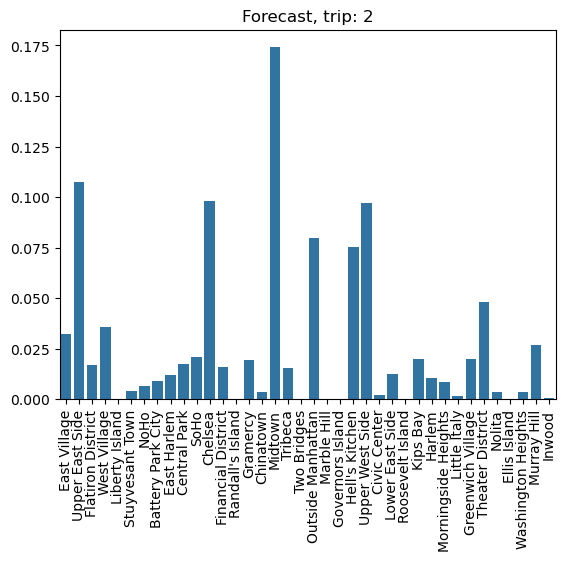

[3.21266573e-02 1.07650265e-01 1.69540318e-02 3.59907426e-02
 3.24041075e-08 4.13650249e-03 6.43546863e-03 8.91556288e-03
 1.22118549e-02 1.74176584e-02 2.09713912e-02 9.78274224e-02
 1.57598918e-02 1.21756754e-04 1.95313074e-02 3.59513180e-03
 1.74088237e-01 1.55661736e-02 3.32884147e-04 7.97414342e-02
 2.50759574e-05 3.80338612e-07 7.51989590e-02 9.70992204e-02
 2.02557793e-03 1.25376653e-02 2.83277191e-04 1.98833591e-02
 1.03771545e-02 8.33980104e-03 1.43137042e-03 2.00568811e-02
 4.80430890e-02 3.75439434e-03 9.10194652e-08 3.77534586e-03
 2.70326034e-02 7.61348072e-04]


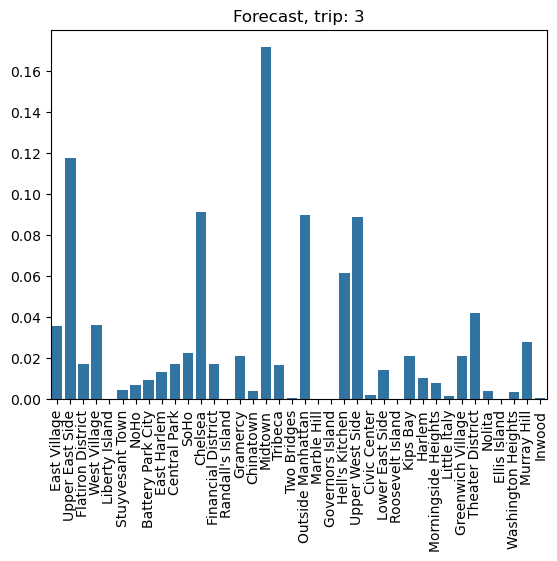

[3.54693945e-02 1.17555047e-01 1.71806084e-02 3.63125205e-02
 3.89269155e-08 4.52764924e-03 7.02754716e-03 9.37975832e-03
 1.33951574e-02 1.71305334e-02 2.24696069e-02 9.11474477e-02
 1.73294216e-02 1.41836887e-04 2.08466965e-02 4.06134752e-03
 1.71399088e-01 1.66303019e-02 3.87879076e-04 8.97833547e-02
 2.35549993e-05 4.45157568e-07 6.14413197e-02 8.88404878e-02
 2.25967939e-03 1.42281316e-02 3.15790917e-04 2.12065386e-02
 1.02505190e-02 7.99219612e-03 1.54507549e-03 2.12162241e-02
 4.20691176e-02 4.17901709e-03 1.08915544e-07 3.54815919e-03
 2.80068915e-02 7.01507425e-04]


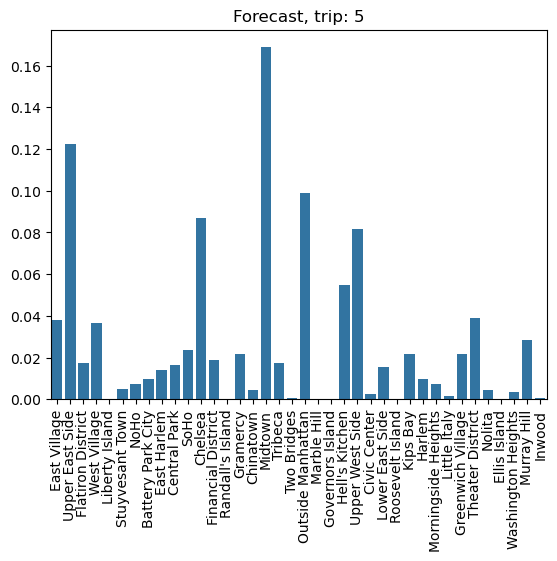

[3.78681777e-02 1.22255584e-01 1.71846787e-02 3.63585685e-02
 4.26113233e-08 4.77410380e-03 7.44011530e-03 9.77132173e-03
 1.39145547e-02 1.65132021e-02 2.35212316e-02 8.68819454e-02
 1.86450486e-02 1.55179400e-04 2.16105464e-02 4.45071982e-03
 1.68766055e-01 1.74225852e-02 4.33723563e-04 9.89958975e-02
 2.21756626e-05 4.98670790e-07 5.47085267e-02 8.15683920e-02
 2.44433985e-03 1.56095313e-02 3.40763724e-04 2.19293891e-02
 9.79656079e-03 7.41383189e-03 1.63952357e-03 2.19251804e-02
 3.87640652e-02 4.50554334e-03 1.24068753e-07 3.29507667e-03
 2.84247221e-02 6.48473236e-04]


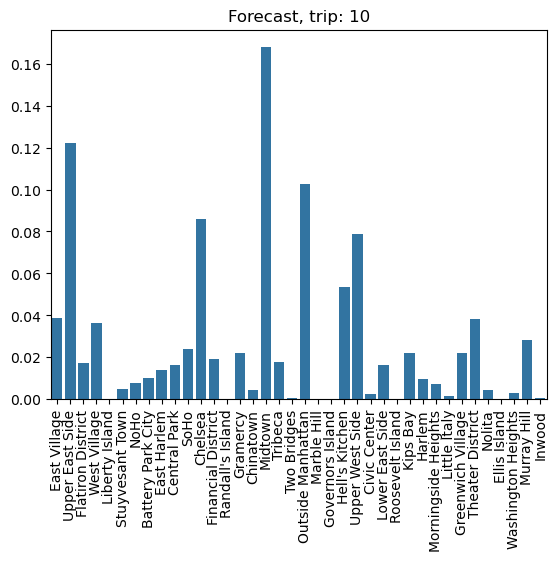

[3.86539780e-02 1.21985664e-01 1.72071150e-02 3.65198110e-02
 4.34986146e-08 4.84252401e-03 7.58210277e-03 9.96562559e-03
 1.38216465e-02 1.61462094e-02 2.39435616e-02 8.61324682e-02
 1.91923742e-02 1.57063999e-04 2.18356666e-02 4.60142012e-03
 1.67808377e-01 1.77665802e-02 4.51336814e-04 1.02769940e-01
 2.15129496e-05 5.21278246e-07 5.33531228e-02 7.87043437e-02
 2.51706268e-03 1.61109206e-02 3.48626361e-04 2.21046028e-02
 9.47979636e-03 7.10556037e-03 1.67799306e-03 2.21967653e-02
 3.80827439e-02 4.62539554e-03 1.30274034e-07 3.16633464e-03
 2.84963909e-02 6.24668394e-04]


In [111]:
# prediction sequence starting from Hell's Kitchen
idx = states.index('Hell\'s Kitchen')
# idx

#initial state
density = np.zeros(len(states))
density[idx] = 1

sns.barplot(x=states,y=density).set(title=f'Forecast: 0')
plt.xticks(rotation=90)
plt.show()

#forecast for 2, 3, 5, and 10 trips
forecast = ['Hell\'s Kitchen']
for i in range(11):
    density = tr_pr@density
    forecast.append(density)
    if i in [2,3,5,10]:
        sns.barplot(x=states,y=density).set(title=f'Forecast, trip: {str(i)}')
        plt.xticks(rotation=90)
        plt.show()
        print(density)

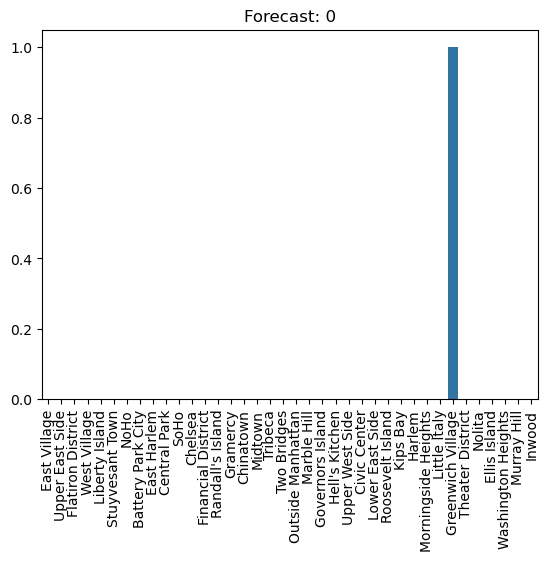

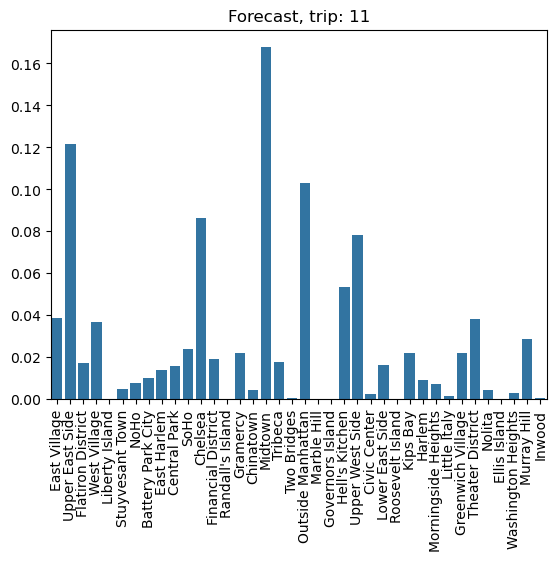

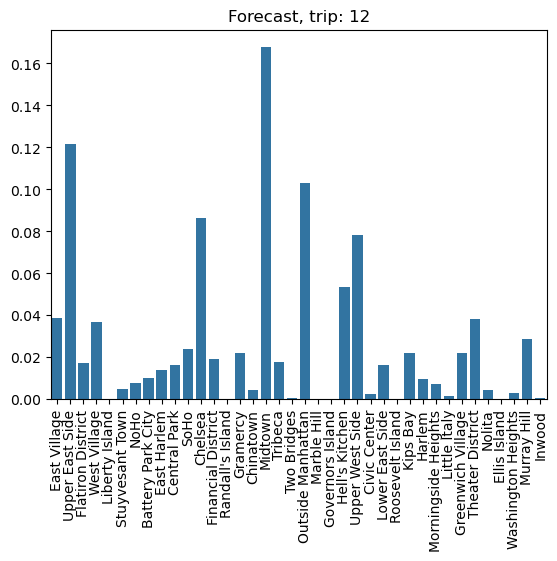

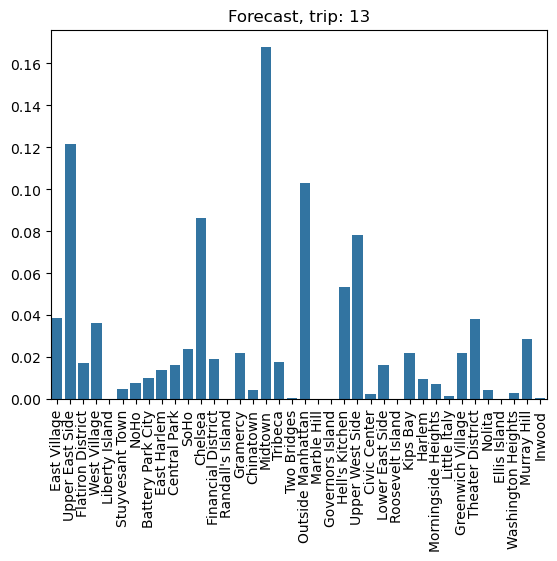

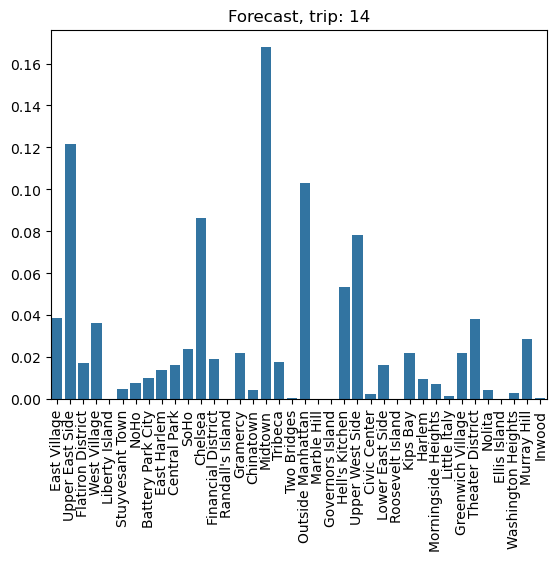

In [120]:
# prediction sequence starting from Greenwich Village
idx = states.index('Greenwich Village')
# idx

#initial state
density = np.zeros(len(states))
density[idx] = 1

sns.barplot(x=states,y=density).set(title=f'Forecast: 0')
plt.xticks(rotation=90)
plt.show()

forecast = ['Greenwich Village']
for i in range(15):
    density = tr_pr@density
    forecast.append(density)
    if i > 10:
        sns.barplot(x=states,y=density).set(title=f'Forecast, trip: {str(i)}')
        plt.xticks(rotation=90)
        plt.show()

    Cabs spend most of their time working in Midtown.